<a href="https://colab.research.google.com/github/Rocha212/Senales/blob/main/corte2/Taller2TomasRocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2: Señales y Sistemas 2024-II

##Profesor: Andrés Marino Álvarez Meza, Ph.D.
##Departamento de Ingeniería Eléctrica, Electrónica, y Computación
##Universidad Nacional de Colombia - sede Manizales
##realizado por: Tomas Rocha Castaño


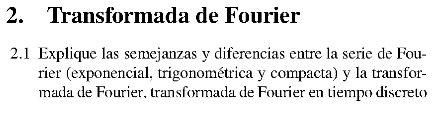

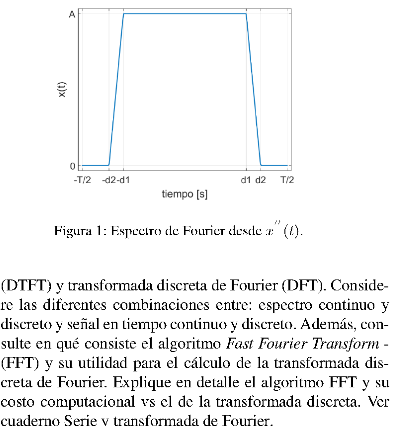

##rta//
Semejanzas y diferencias entre la transformada de fourier y la serie de fourier
semejanzas
- La transformada y la serie de fourier analizan las señales $x(t)$ en tiempo continuo

- la transformada y serie de fourier analizan las señales $x(t)$ como una combinacion de funciones a bases ortogonales

- las 2 transforman señales en el dominio del tiempo al dominio de la frecuencia

diferencias
- La serie de fourier analiza a $x(t)$ en un intervalo de tiempo finito en espectro de frecuencia discreto, mientras que la transformada de fourier analiza a $x(t)$ sobre un intervalo de tiempo infinito $(-∞, ∞)$ en espectro de frecuencia continuo

- el dominio de la aplicacion de la serie de fourier son en las señales periodicas mientras que el dominio de la aplicacion de la transformada de fourier son las señales aperiodicas o no periodicas


Semejanzas y diferencias entre la transformada de fourier en tiempo discreto(DTFT) y transformada discreta de fourier (DFT)

semjanzas

- ambas transformadas analizan señales en el timepo y las llevan al dominio de la frecuencia

- las dos utilizan el euler complejo, la primera ecuacion es de la transformada de fourier en tiempo discreto y la segunda ecuacion es la transformada discreta de fourier


\begin{equation}
X(\omega) = \sum_{k\in\mathbb{Z}}{x[k]e^{-j\omega k}},
\end{equation}

\begin{equation}
X[n] = \sum_{k=0}^{K-1}{x[k]e^{-jk\frac{2\pi n}{K}}},
\end{equation}



diferencias

- la DTFT Se define para señales discretas con una duracion infinita, mientras que DFT se aplica a señales discretas de duracion infinita

- el espectro de frecuancia en el DTFT es continuo y periodico mientras que en el DFT es discreto y periodico


Semejanzas y diferencias entre espectro continuo y espectro discreto y señal en tiempo continuo y discreto

semejanzas del espectro continuo y discreto

- ambos indican como estan distribuidas las frecuencias de una señal

- ambas son resultados de las transformadas de fourier ya sea de señales continuas o discretas

diferencias

- el espectro continuo proviene de señales continuas y el espectro discreto viene de señales discretas


Transformada rápida de fourier(FFT):
a) Concepto
El algoritmo Fast Fourier Transform (FFT) es una optimización de la DFT. Reduce significativamente el número de operaciones necesarias para calcular la transformada discreta. Mientras la DFT tiene una complejidad computacional de $O(N^2)$, la FFT la reduce a $O*N*log(N)$ Donde N es el numero de puntos de una señal

- **DFT:**  
  La DFT requiere $ N^2 $ multiplicaciones para calcular la transformada de una señal de $ N $ puntos. Esto la hace poco eficiente para procesar grandes volúmenes de datos.

- **FFT:**  
  La FFT reduce el número de operaciones dividiendo el problema en subproblemas más pequeños de manera recursiva. Su costo computacional es $ N \log N $, siendo mucho más eficiente.

Ejemplo de comparación:
Para una señal con $ N = 1024 $ puntos:
- **DFT:**  
  Número de operaciones: $ 1024^2 = 1,048,576 $.
- **FFT:**  
  Número de operaciones: $ 1024 \log_2 1024 = 1024 \cdot 10 = 10,240 $.




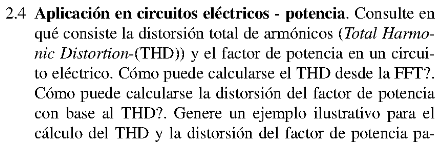

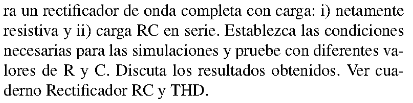

respuesta:

Distorsion total de armonicos:
la THD (Total Harmonic Distortion) permite medir cuanto contribuyen los armoncios en comparacion con la componente fundamental de una señal

$$
THD= ((\sqrt{V_{2}^2+V_{3}^2+V_{4}^2+...+V_{n}^2})/V_{1})*100%
$$

donde v1 es la amplitud de la frecuencia fundamental y el resto son armonicos de la señal

Factor de Potencia con base en el THD:
el factor de potencia es un medida de que tan eficiente es un sistema electrico con la energia que recibe



$$
FP= FP_{fundamental}*(1/\sqrt{(1+THD^2)})
$$

Como puede calcularse el THD desde la FFT?
para calcular el Thd desde la FFT primero


1.   obtener la FFT de la señal y extraer las amplitudes espectrales
2.   identificar la frecuencia fundamental V1

3. identificar los armonicos

4. aplicar la siguiente formula del THD para obtener el resultado

$$
THD= ((\sqrt{V_{2}^2+V_{3}^2+V_{4}^2+...+V_{n}^2})/V_{1})*100%
$$



como puede calcularse la distorsion del factor de potencia con base en el THD?
se puede calcular conla siguiente formula:

$$
THD= ((\sqrt{V_{2}^2+V_{3}^2+V_{4}^2+...+V_{n}^2})/V_{1})*100%
$$



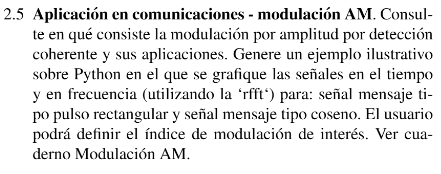

La modulacion se entiende como el proceso por el cual un mensaje se adecua al medio de transmision
- Se requiere entonces de una portadora (carrier) senoidal/cosenoidal:

$$c(t)=A_c\sin(2\pi F_c t)$$

- Para ilustrar el proceso, se trabaja con un mensaje tipo sen/cos:

$$m(t) = A_m \cos(2\pi F_m t)$$

- La modulación AM puede calibrarse en términos del índice de modulación:

$$I_m = \frac{Peak\{|m(t)|\}}{A_c}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.sinc(2*np.pi*Fm*(t-0.5*tf)/np.pi)#Am*np.cos(2*np.pi*Fm*t) #mensaje #

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


Se grafican las señales mensaje y portadora:

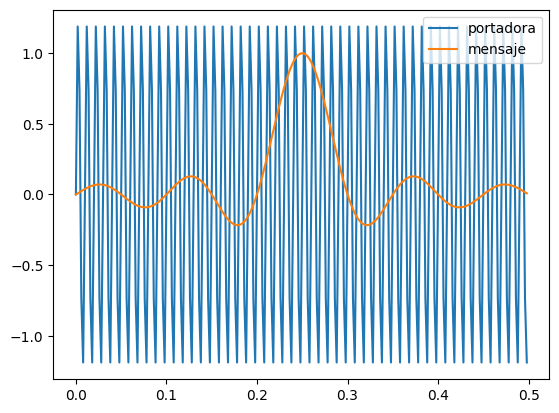

In [2]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

In [3]:
y = (1+m/Ac)*c #señal modulada en AM

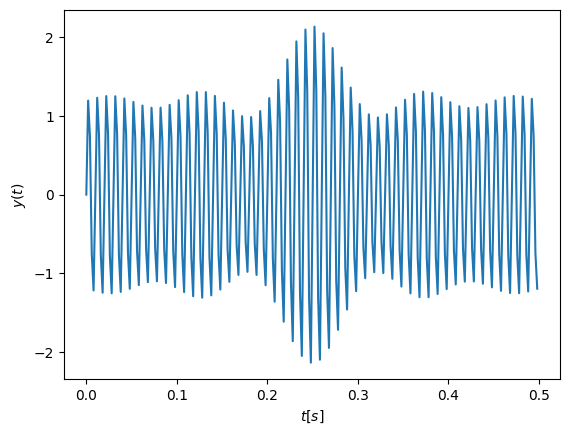

In [4]:
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

A continuación, se presenta el espectro de la señal mensaje, portadora y modulada.

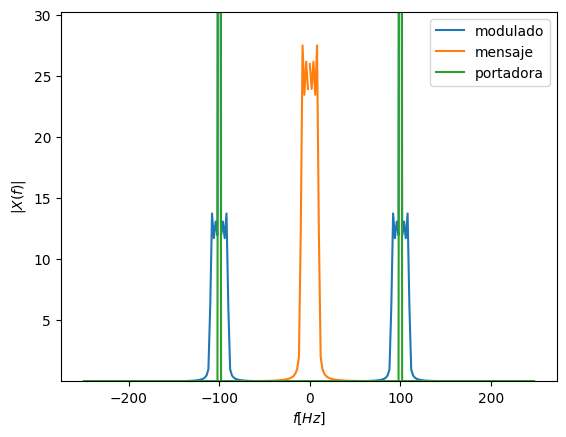

In [5]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

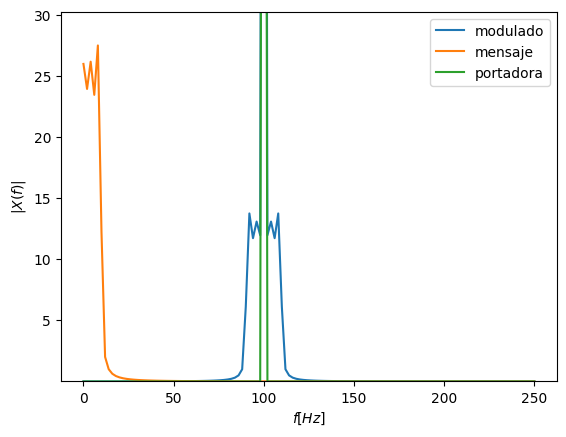

In [6]:
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(m)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()